<div align="middle" style="padding-top: 80px;">
<video width="100%" controls src="./assets/tepache.mp4" type="video/mp4" loop></video>
</div>

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/init.png"/>
</div>

## Overview de la charla

* ¿Qué es el *Machine Learning*?
* Modelos de aprendizaje
* Cuando las máquinas aprenden
* Ejemplos de modelos de aprendizaje de máquina
    * Predicción de precios de casas en Boston
    * Clasificando spam del email
    * Decidiendo si voy a la DevNight de hoy

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/intro.png"/>
</div>

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/intro1.png"/>
</div>

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/Modelos.png"/>
</div>

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/Modelos1.png"/>
</div>

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/Modelos2.png"/>
</div>

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/Modelos3.png"/>
</div>

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/aprenden.png"/>
</div>

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/aprenden1.png"/>
</div>

## Para entender... ¡Ejemplos!
* Predicción de precios de casas en Boston
* Clasificando spam del email
* Decidiendo si voy a la DevNight de hoy

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/lineal.png"/>
</div>

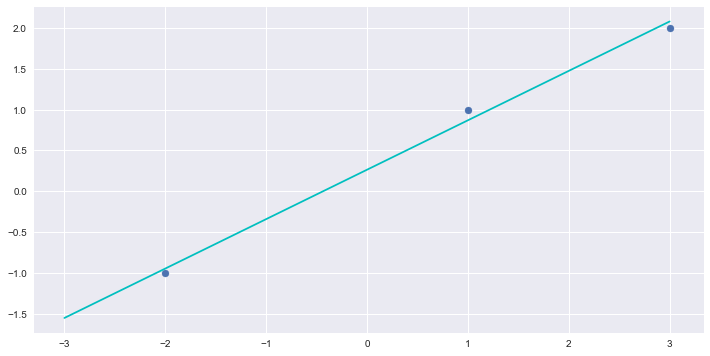

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

x = np.linspace(-3, 3, 1000)
y = (0.6052631579)*x + (0.2631578947)

plt.figure(figsize=(12,6))
plt.plot(x, y, "-c")
plt.scatter([-2, 1, 3], [-1, 1, 2])

In [3]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

# Cargamos datos:
boston = datasets.load_boston()
y = boston.target

# Creamos modelo de regresión lineal:
lr = linear_model.LinearRegression()

# Predecimos: 
predicted = cross_val_predict(lr, boston.data, y, cv=10)

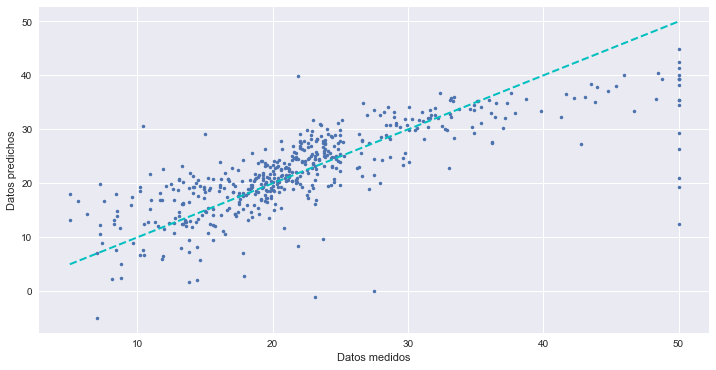

In [4]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(y, predicted, ".")
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'c--', lw=2)
ax.set_xlabel('Datos medidos')
ax.set_ylabel('Datos predichos')
plt.show()

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/mail.png"/>
</div>

In [5]:
from textblob.classifiers import NaiveBayesClassifier

entrenamiento = [
    # SPAM:
    ("Te ofrecemos una tarjeta de crédito del Banco X.", "SPAM"),
    ("¡Anímate a comprar el último modelo de nuestros teléfonos!.", "SPAM"),
    ("Aviso de demanda. Soy tu primo lejano...", "SPAM"),
    ("¡Acabas de ganar 150,000 pesos!", "SPAM"),
    ("¡No pierdas la oportunidad de ganar un automóvil!", "SPAM"),
    # NOT SPAM:
    ("Tarea 3. Redes computacionales.", "NOT SPAM"),
    ("Invitación al Seminario de Deep Learning el próximo martes.", "NOT SPAM"),
    ("Calendario: DevNight 7:30 pm en León.", "NOT SPAM"),
    ("Recordatorio del taller básico de Arduino.", "NOT SPAM"),
    ("Dev.to() -> 7 must read posts from last week.", "NOT SPAM")
]

# Creamos modelo de clasificación:
dev_Bayes = NaiveBayesClassifier(entrenamiento)

In [7]:
#dev_Bayes.classify("Adquiere una membresía a nuestro club premier.")
dev_Bayes.classify("Nueva tarea sobre análisis matemático.")

'NOT SPAM'

<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/ann.png"/>
</div>

In [8]:
import numpy as np

class PerceptronDevNight():
    def __init__(self, entradas, pesos):
        """Constructor de la clase."""
        self.n = len(entradas)
        self.entradas = np.array(entradas)
        self.pesos = np.array(pesos)
    
    def voy_no_voy(self, umbral):
        """Calcula el output deseado."""
        si_no = (self.entradas @ self.pesos) >= umbral
        if si_no: return "Sí voy."
        else: return "No voy."

In [10]:
entradas = [1, 1, 1, 1]
pesos = [-4, 3, 1, 2]

dev = PerceptronDevNight(entradas, pesos)
dev.voy_no_voy(3)

'No voy.'

In [11]:
from tqdm import tqdm_notebook as tqdm
import numpy as np

class SigmoidNeuron():
    def __init__(self, n):
        np.random.seed(123)
        self.synaptic_weights = 2 * np.random.random((n, 1)) - 1

    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, training_inputs, training_output, iterations):
        for iteration in tqdm(range(iterations)):
            output = self.predict(training_inputs)
            error = training_output.reshape((len(training_inputs), 1)) - output
            adjustment = np.dot(training_inputs.T, error *
                                self.__sigmoid_derivative(output))
            self.synaptic_weights += adjustment

    def predict(self, inputs):
        return self.__sigmoid(np.dot(inputs, self.synaptic_weights))


In [12]:
# Initialize Sigmoid Neuron:
sigmoid = SigmoidNeuron(2)
print("Inicialización de pesos aleatorios:")
print(sigmoid.synaptic_weights)

# Datos de entrenamiento:
training_inputs = np.array([[1, 0], [0, 0], [0, 1]])
training_output = np.array([1, 0, 1]).T.reshape((3, 1))

# Entrenamos la neurona (100,000 iteraciones):
sigmoid.train(training_inputs, training_output, 100000)
print("Nuevos pesos sinápticos luego del entrenamiento: ")
print(sigmoid.synaptic_weights)

# Predecimos para probar la red:
print("Predicción para [1, 1]: ")
print(sigmoid.predict(np.array([1, 1]))) 

Inicialización de pesos aleatorios:
[[ 0.39293837]
 [-0.42772133]]



Nuevos pesos sinápticos luego del entrenamiento: 
[[ 6.09629146]
 [ 6.09625877]]
Predicción para [1, 1]: 
[ 0.99999493]


<div align="middle" style="padding-top: 50px;">
<img width="100%" src="./assets/thanks.png"/>
</div>

#### Cargar estilo de slides

In [1]:
from IPython.core.display import HTML
def css_styling():
    style = open("./assets/mystyle.css", "r").read()
    return HTML(style)
css_styling()